In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
loan_data = pd.read_csv('loan.csv')

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(20000, 142)

In [5]:
loan_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv            int64
                          ...   
settlement_status        float64
settlement_date          float64
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 142, dtype: object

In [6]:
loan_data['loan_amnt'].describe()

count    20000.000000
mean     16111.383750
std      10369.193761
min       1000.000000
25%       8000.000000
50%      14000.000000
75%      22000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [9]:
loan_data= loan_data.drop(['zip_code', 'policy_code', 'application_type', 'last_credit_pull_d', 'verification_status', 'pymnt_plan', 'funded_amnt_inv', 'sub_grade', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'initial_list_status'], axis =1)

In [10]:
loan_data.shape

(20000, 122)

In [11]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
col_num=0
TotalObjects = loan_data.shape[0]
print ("Column\t\t\t\t\t Null Values%") 
for x in loan_data:
    nullCount = loan_data[x].isnull().sum(); 
    nullPercent = nullCount*100 / (TotalObjects) 
    if nullCount > 0 and nullPercent > 20 :
        col_num=col_num+1
        loan_data.drop(x, axis=1,inplace=True) 
        print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !")

Column					 Null Values%
id					 100.0
member_id					 100.0
url					 100.0
desc					 100.0
mths_since_last_delinq					 56.375
mths_since_last_record					 88.41
mths_since_last_major_derog					 77.47
annual_inc_joint					 87.845
dti_joint					 87.845
verification_status_joint					 89.17
mths_since_recent_bc_dlq					 80.36
mths_since_recent_revol_delinq					 71.3
revol_bal_joint					 87.845
sec_app_earliest_cr_line					 87.845
sec_app_inq_last_6mths					 87.845
sec_app_mort_acc					 87.845
sec_app_open_acc					 87.845
sec_app_revol_util					 88.0
sec_app_open_act_il					 87.845
sec_app_num_rev_accts					 87.845
sec_app_chargeoff_within_12_mths					 87.845
sec_app_collections_12_mths_ex_med					 87.845
sec_app_mths_since_last_major_derog					 96.295
hardship_type					 100.0
hardship_reason					 100.0
hardship_status					 100.0
deferral_term					 100.0
hardship_amount					 100.0
hardship_start_date					 100.0
hardship_end_date					 100.0
payment_plan_start_date					 100.0
hardship_length		

In [14]:
loan_data.shape

(20000, 79)

In [15]:
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


In [17]:
loan_data['emp_title'] = loan_data['emp_title'].fillna('Unknown')

In [19]:
loan_data['dti'] = loan_data['dti'].fillna(0)

In [20]:
loan_data['revol_util'] = loan_data['revol_util'].fillna(loan_data['revol_util'].mean())

In [21]:
loan_data['next_pymnt_d'] = loan_data['next_pymnt_d'].fillna('Completed')

In [23]:
# Replace missing values with 0 for specific columns
cols_zero = [
    'mths_since_rcnt_il',
    'mo_sin_old_il_acct',
    'bc_open_to_buy',
    'num_tl_120dpd_2m',
    'bc_util',
    'percent_bc_gt_75'
]

loan_data[cols_zero] = loan_data[cols_zero].fillna(0)

In [24]:
cols_mean = ['all_util','avg_cur_bal']
loan_data[cols_mean] = loan_data[cols_mean].fillna(loan_data[cols_mean].mean())

# Formatting data

In [25]:
pd.unique(loan_data['emp_length'].values)

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [26]:
def CalculateEmployeeLength(year): 
    if year == '< 1 year':
        return 0.5
    elif year == '10+ years': 
        return 10
    else:
        yr=str(year)
        return yr.rstrip(' years')

In [27]:
loan_data['emp_length']=loan_data['emp_length'].apply(CalculateEmployeeLength)

In [28]:
loan_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,36 months,13.56,84.92,C,Chef,10,RENT,55000.0,...,0.0,1,0,60124,16901,36500,18124,N,Cash,N
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10,MORTGAGE,90000.0,...,0.0,1,0,372872,99468,15000,94072,N,Cash,N
2,5000,5000,36 months,17.97,180.69,D,Administrative,6,MORTGAGE,59280.0,...,0.0,0,0,136927,11749,13800,10000,N,Cash,N
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10,MORTGAGE,92000.0,...,100.0,0,0,385183,36151,5000,44984,N,Cash,N
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10,MORTGAGE,57250.0,...,0.0,0,0,157548,29674,9300,32332,N,Cash,N


# Visualizing data

In [30]:
def CalculateLoanRanges(value): 
    if value <= 5000:
        return '5K and Below'
    if value > 5000 and value <= 10000:
        return '5K-10K'
    if value > 10000 and value <= 15000:
        return '10K-15K'
    if value > 15000 and value <= 20000:
        return '15K-20K'
    if value > 20000 and value <= 25000:
        return '20K-25K'
    if value > 25000 and value <= 30000:
        return '25K-30K' 
    if value > 30000 :
        return '30K and Above'
    return 'Other'

In [31]:
loan_ranges = loan_data['loan_amnt'].apply(CalculateLoanRanges)

In [32]:
loan_ranges.value_counts()

loan_amnt
5K-10K           5063
10K-15K          3472
15K-20K          3118
5K and Below     2898
30K and Above    2268
20K-25K          1834
25K-30K          1347
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart of Loan Amount')

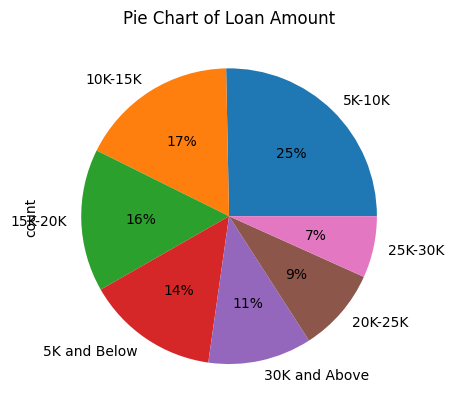

In [33]:
f = plt.figure() 
loan_ranges.value_counts().plot.pie(autopct='%1.0f%%',) 
plt.title('Pie Chart of Loan Amount')

<Axes: xlabel='purpose'>

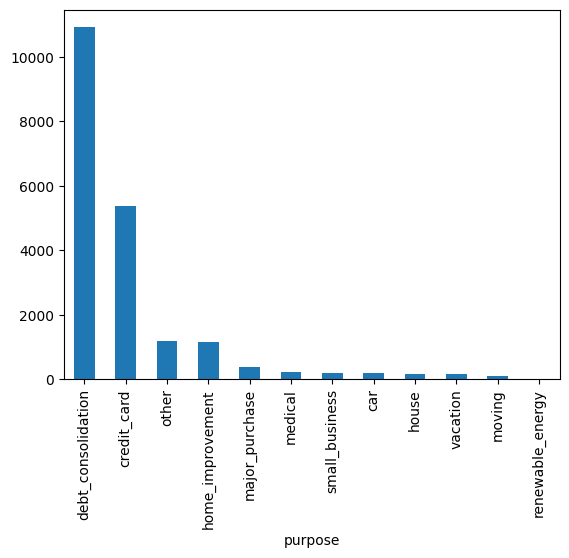

In [34]:
pur = loan_data['purpose'].value_counts() 
pur.plot(kind='bar')

In [35]:
loan_data.to_csv('cleaned_loans2007.csv', index=False,encoding='utf-8')

# Activity 2

How to Detect and Remove Outliers
Step-1: Importing Necessary Dependencies and load the dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df_boston = pd.read_csv('Airdata.csv')

Step-2: Show a preview of the dataset

In [38]:
df_boston.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


Step-3: Generate a Box-plot for the NO2_Location_A feature

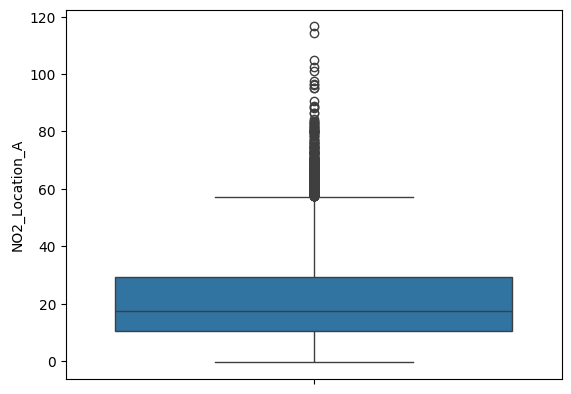

In [39]:
sns.boxplot(df_boston['NO2_Location_A'])
plt.show()

Step-4: Finding the IQR

In [40]:
percentile25 = df_boston['NO2_Location_A'].quantile(0.25)
percentile75 = df_boston['NO2_Location_A'].quantile(0.75)
iqr = percentile75-percentile25

Step-5: Finding upper and lower limit

In [41]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

Step-6: Capping

In [42]:
new_df_cap = df_boston.copy()
new_df_cap['NO2_Location_A'] = np.where(
new_df_cap['NO2_Location_A'] >= upper_limit, upper_limit,
np.where(new_df_cap['NO2_Location_A'] <= lower_limit, lower_limit,
new_df_cap['NO2_Location_A']
)
)

Step-7: Draw boxplot after capping

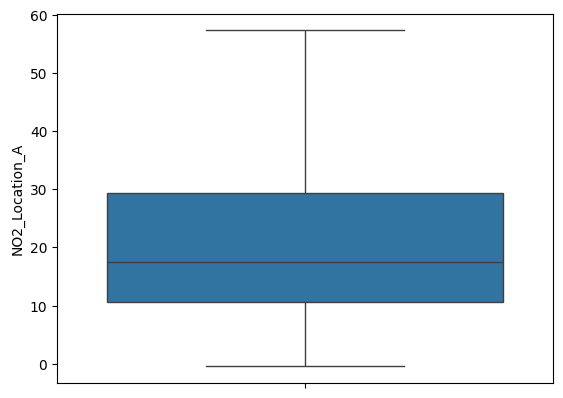

In [43]:
sns.boxplot(new_df_cap['NO2_Location_A'])
plt.show()

# Activity 3

Categorical Feature Selection using Chi squared Test

Step-1: Acquiring dataset and importing all the essential libraries

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_selection import chi2 
from sklearn.model_selection import train_test_split 
df=pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv")

Step-2: Show a preview of the dataset

In [45]:
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


Step-3: Feature Encoding

In [46]:
#a. Extract all the features which has categorical variables
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
tenure                int64
ServiceCount          int64
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [47]:
#b. Extract all the features having categorical variable and then will do feature encoding on all of them.
df["gender"]=df["gender"].map({"Female":1,"Male":0})
df["Contract"]=df["Contract"].map({'Month-to-month':0, 'One year':1, 'Two year':2}) 
df["PaperlessBilling"]=df["PaperlessBilling"].map({"Yes":0,"No":1}) 

#select needed columns 
cat_df=df[["gender","Contract","PaperlessBilling","Churn"]] 
cat_df.head()

,gender,Contract,PaperlessBilling,Churn
0,1,0,0,No
1,0,1,1,No
2,0,0,0,Yes
3,0,1,1,No
4,1,0,0,Yes


Step 4 : Applying Chi Squared test

In [48]:
#Independent variable 
x=cat_df.iloc[:,:-1] 

#Target variable 
y=cat_df.iloc[:,-1] 
#returns f score and p value 
f_score=chi2(x,y) 
f_score 

p_value=pd.Series(f_score[1],index=x.columns) 
p_value.sort_values(ascending=True)

Contract            1.227941e-244
PaperlessBilling     3.008474e-35
gender               6.076114e-01
dtype: float64

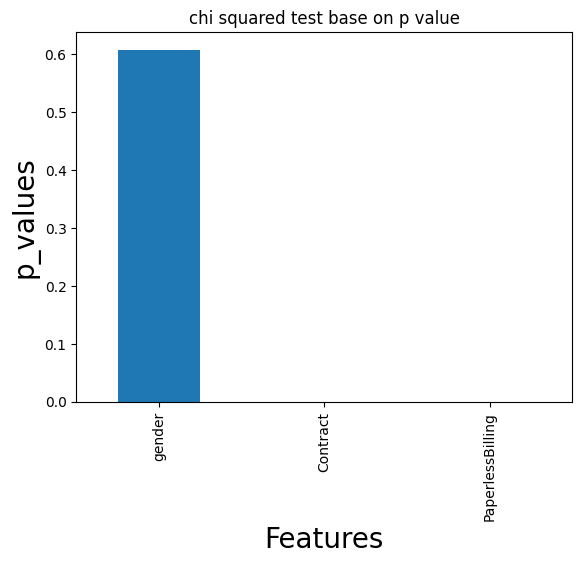

In [49]:
p_value.plot(kind="bar") 
plt.xlabel("Features",fontsize=20) 
plt.ylabel("p_values",fontsize=20) 
plt.title("chi squared test base on p value") 
plt.show()

# Exercise

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [53]:
exercise_data = pd.read_csv("Building_permits.csv", low_memory=False)


In [54]:
exercise_data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,2.01505E+11,4,sign - erect,5/6/2015,326,23,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,2.01604E+11,4,sign - erect,4/19/2016,306,7,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,2.01605E+11,3,additions alterations or repairs,5/27/2016,595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,2.01611E+11,8,otc alterations permit,11/7/2016,156,11,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,2.01611E+11,6,demolitions,11/28/2016,342,1,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445480e+11


In [55]:
exercise_data.shape

(17647, 43)

In [66]:
# Step 1: Remove columns with more than 20% missing data
threshold = 0.2  # 20%
df = df.loc[:, df.isnull().mean() < threshold]

In [67]:
exercise_data.shape

(17647, 43)

In [68]:
# Step 2: Remove irrelevant columns

irrelevant_cols = [
    "Current Status Date",
    "Description",
    "Zipcode",
    "Block",
    "Lot",
    "Supervisor District",
    "Neighborhoods - Analysis Boundaries",
    "Existing Construction Type",
    "Existing Construction Type Description",
    "Number of Existing Stories",
    "Location"
]

df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns])

In [69]:
# Step 3: Replace numeric columns with mean
# -----------------------------
numeric_cols = ["Estimated Cost", "Revised Cost", "Number of Proposed Stories"]

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [70]:
# Step 4: Replace missing values with 'unknown'
# -----------------------------
text_cols = [
    "Street Suffix",
    "Existing Use",
    "Proposed Use",
    "Plansets",
    "Proposed Construction Type",
    "Proposed Construction Type Description"
]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")


In [71]:
# Step 5: Replace missing date values with today
# -----------------------------
date_cols = ["Issued Date", "First Construction Document Date"]
today = pd.to_datetime(datetime.today().date())

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")  # convert to datetime first
        df[col] = df[col].fillna(today)


In [72]:
# Step 6: Visualization - Estimated Cost (Pie Chart)
# -----------------------------
if "Estimated Cost" in df.columns:
    # Create cost ranges
    bins = [0, 10000, 50000, 100000, 500000, 1000000, df["Estimated Cost"].max()]
    labels = ["<10k", "10k-50k", "50k-100k", "100k-500k", "500k-1M", ">1M"]
    
    df["Cost Range"] = pd.cut(df["Estimated Cost"], bins=bins, labels=labels, include_lowest=True)

    cost_counts = df["Cost Range"].value_counts().sort_index()
    
    plt.figure(figsize=(7,7))
    plt.pie(cost_counts, labels=cost_counts.index, autopct="%1.1f%%", startangle=90)
    plt.title("Distribution of Estimated Cost")
    plt.show()

In [73]:
# Step 7: Visualization - Existing Use (Bar Chart)
# -----------------------------
if "Existing Use" in df.columns:
    plt.figure(figsize=(10,6))
    df["Existing Use"].value_counts().plot(kind="bar")
    plt.title("Distribution of Existing Use of Permits")
    plt.xlabel("Existing Use")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.show()